In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
import splitfolders
import os

In [5]:
image_loc = 'D:\Medicinal Leaf Dataset'

splitfolders.ratio(image_loc, output='output', seed=1337, ratio=(0.8,0.1,0.1))

Copying files: 1615 files [00:19, 81.32 files/s] 


In [6]:
IMAGE_SIZE = [224,224]

train_path = 'output\\train'
validation_path = 'output\\test'

In [11]:
mobNet = MobileNet(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

17235968/17225924 [==============================] - 3s 0us/step


In [12]:
mobNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [14]:
for layer in mobNet.layers:
    layer.trainable = False

In [15]:
folders = glob('D:\Medicinal Leaf Dataset\*')

In [17]:
x = Flatten()(mobNet.output)

In [18]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = mobNet.input, outputs = prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [20]:
model.compile(
loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataGen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataGen  = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_dataGen.flow_from_directory('output\\train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 1360 images belonging to 26 classes.


In [23]:
val_set = train_dataGen.flow_from_directory('output\\val',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 333 images belonging to 26 classes.


In [24]:
r = model.fit_generator(
training_set,
validation_data = val_set,epochs = 50,
steps_per_epoch = len(training_set),
validation_steps = len(val_set)
)

<ipython-input-24-5c48062396c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
43/43 [==============================] - 99s 2s/step - loss: 3.7846 - accuracy: 0.7390 - val_loss: 0.5674 - val_accuracy: 0.9399
Epoch 2/50
43/43 [==============================] - 89s 2s/step - loss: 0.3138 - accuracy: 0.9625 - val_loss: 0.2717 - val_accuracy: 0.9730
Epoch 3/50
43/43 [==============================] - 89s 2s/step - loss: 0.4611 - accuracy: 0.9588 - val_loss: 0.4319 - val_accuracy: 0.9489
Epoch 4/50
43/43 [==============================] - 89s 2s/step - loss: 0.1987 - accuracy: 0.9765 - val_loss: 0.9114 - val_accuracy: 0.9309
Epoch 5/50
43/43 [==============================] - 89s 2s/step - loss: 0.2556 - accuracy: 0.9743 - val_loss: 0.1700 - val_accuracy: 0.9910
Epoch 6/50
43/43 [==============================] - 89s 2s/step - loss: 0.0728 - accuracy: 0.9853 - val_loss: 0.1996 - val_accuracy: 0.9820
Epoch 7/50
43/43 [==============================] - 90s 2s/step - loss: 0.1239 - accuracy: 0.9853 - val_loss: 1.0974 - val_accuracy: 0.9249
Epoch 8/50
43/43 [==

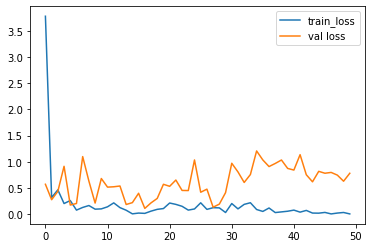

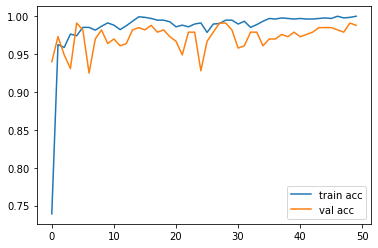

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('Leaves2.mobNet.h5')

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
t_set = test_dataGen.flow_from_directory('output\\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )


Found 181 images belonging to 26 classes.


In [29]:
y_pred = model.predict(t_set)

In [30]:
y_pred

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [32]:
y_pred

array([ 1, 13,  4, 15,  2,  7,  2,  6, 16, 18,  6, 13, 10,  1,  6, 25, 14,
        4,  8, 22, 14,  6, 22,  7, 20,  1,  6, 16,  8,  1, 11,  0,  4,  5,
       12,  7, 24, 21, 11,  9,  0,  1,  7, 16,  2, 16, 19, 11, 10, 24, 23,
        2, 14, 23, 19, 12,  1,  7,  3, 24, 10, 11, 16, 23, 12,  9,  6, 18,
       21,  8, 24, 21, 14, 16, 14, 18,  4, 23, 22,  7,  9, 11, 11, 10, 20,
       24,  3,  2, 21, 25, 22, 11, 12, 13, 23,  4, 19, 13, 20,  9,  1,  1,
       15, 14, 13,  5, 13, 24, 11,  6, 17, 24, 17, 22, 25,  6, 19, 11, 14,
       13,  0, 21,  4, 12, 16, 15,  2, 15, 20,  5, 12, 13,  9, 17, 13, 24,
       20,  8, 17, 12,  5,  1, 15,  9, 21, 19,  2,  3,  1, 13, 17, 17,  7,
       13, 24, 18,  4,  4,  1,  4, 22, 22, 23, 15,  0,  4, 17,  1,  1, 19,
       20, 14,  4, 17, 15, 23, 10, 14,  9, 16,  3], dtype=int64)

In [34]:
from keras.models import load_model
model = load_model('Leaves2.mobNet.h5')

In [35]:
files = glob('output\\train\\*')

In [36]:
files = list(map(lambda x: x.replace('output\\train\\',''),files))
files

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)']

In [37]:
name_id_map = { i : files[i] for i in range(0, len(files) ) }
name_id_map

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)'}

In [38]:
y_pred

array([ 1, 13,  4, 15,  2,  7,  2,  6, 16, 18,  6, 13, 10,  1,  6, 25, 14,
        4,  8, 22, 14,  6, 22,  7, 20,  1,  6, 16,  8,  1, 11,  0,  4,  5,
       12,  7, 24, 21, 11,  9,  0,  1,  7, 16,  2, 16, 19, 11, 10, 24, 23,
        2, 14, 23, 19, 12,  1,  7,  3, 24, 10, 11, 16, 23, 12,  9,  6, 18,
       21,  8, 24, 21, 14, 16, 14, 18,  4, 23, 22,  7,  9, 11, 11, 10, 20,
       24,  3,  2, 21, 25, 22, 11, 12, 13, 23,  4, 19, 13, 20,  9,  1,  1,
       15, 14, 13,  5, 13, 24, 11,  6, 17, 24, 17, 22, 25,  6, 19, 11, 14,
       13,  0, 21,  4, 12, 16, 15,  2, 15, 20,  5, 12, 13,  9, 17, 13, 24,
       20,  8, 17, 12,  5,  1, 15,  9, 21, 19,  2,  3,  1, 13, 17, 17,  7,
       13, 24, 18,  4,  4,  1,  4, 22, 22, 23, 15,  0,  4, 17,  1,  1, 19,
       20, 14,  4, 17, 15, 23, 10, 14,  9, 16,  3], dtype=int64)

In [39]:
predicted_classes = list(map(name_id_map.get, y_pred))

In [40]:
predicted_classes

['Amaranthus Viridis (Arive-Dantu)',
 'Mentha (Mint)',
 'Basella Alba (Basale)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Citrus Limon (Lemon)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Carissa Carandas (Karanda)',
 'Murraya Koenigii (Curry)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Carissa Carandas (Karanda)',
 'Mentha (Mint)',
 'Hibiscus Rosa-sinensis',
 'Amaranthus Viridis (Arive-Dantu)',
 'Carissa Carandas (Karanda)',
 'Santalum Album (Sandalwood)',
 'Moringa Oleifera (Drumstick)',
 'Basella Alba (Basale)',
 'Ficus Auriculata (Roxburgh fig)',
 'Pongamia Pinnata (Indian Beech)',
 'Moringa Oleifera (Drumstick)',
 'Carissa Carandas (Karanda)',
 'Pongamia Pinnata (Indian Beech)',
 'Citrus Limon (Lemon)',
 'Piper Betle (Betel)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Carissa Carandas (Karanda)',
 'Murraya Koenigii (Curry)',
 'Ficus Auriculata (Roxburgh fig)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Jasminum (Jasmine)',
 'Alpinia Gala

In [41]:
loss, accuracy = model.evaluate(t_set, verbose=2)


6/6 - 5s - loss: 1.6469 - accuracy: 0.9779 - 5s/epoch - 826ms/step


In [42]:
print(f"accuracy on test data is : {round(accuracy*100)} %")

accuracy on test data is : 98 %
